In [36]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


1. Imports and Common Functions

In [55]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import matplotlib.pyplot as plt

2. Technical Indicator Calculation

In [57]:
def add_technical_indicators(df):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']

    sma = df['Close'].rolling(20).mean()
    std = df['Close'].rolling(20).std()
    df['BB_Upper'] = sma + 2 * std
    df['BB_Lower'] = sma - 2 * std

    return df.dropna()


3. Sequence Creator

In [59]:
def create_sequences(data, target_col_idx, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, target_col_idx])
    return np.array(X), np.array(y)


4. Model Builder

In [61]:
def build_model(model_type, input_shape):
    model = Sequential()
    RNNLayer = LSTM if model_type == 'LSTM' else GRU
    model.add(RNNLayer(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(RNNLayer(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


5. Train & Evaluate Function

In [63]:
def train_and_evaluate(df, stock_name, model_type='LSTM', lookback=30):
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'BB_Upper', 'BB_Lower']
    df = add_technical_indicators(df)

    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), index=df.index, columns=features)

    X, y = create_sequences(df_scaled.values, df_scaled.columns.get_loc('Close'), lookback)
    split = int(0.8 * len(X))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

    model = build_model(model_type, input_shape=(X.shape[1], X.shape[2]))
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)

    print(f"{stock_name} - {model_type} RMSE: {rmse:.2f}, MAE: {mae:.2f}")

    plt.figure(figsize=(10,4))
    plt.plot(y_test, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f"{stock_name} - {model_type}")
    plt.legend()
    plt.show()

    return rmse, mae


6. Main Loop Over Stocks

C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
TCS - LSTM RMSE: 0.03, MAE: 0.02


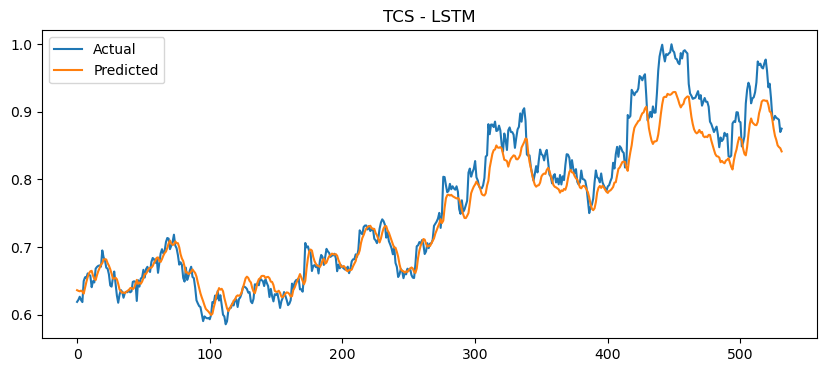

C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
TCS - GRU RMSE: 0.03, MAE: 0.02


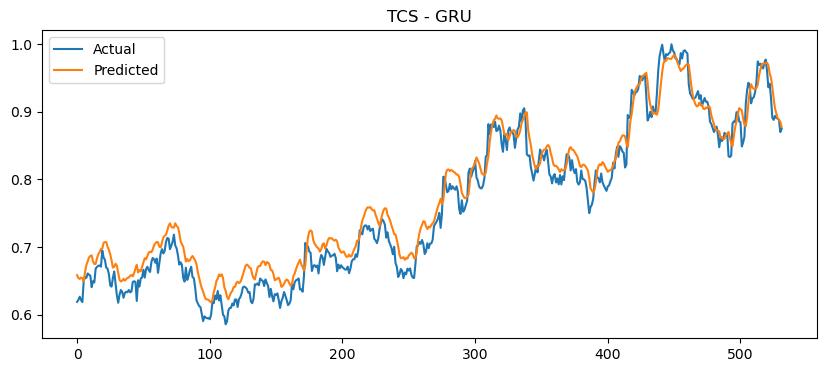

C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
RELIANCE - LSTM RMSE: 0.03, MAE: 0.02


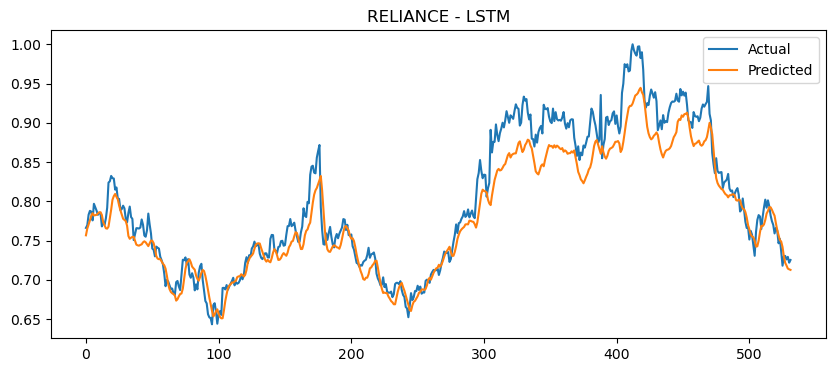

C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
RELIANCE - GRU RMSE: 0.02, MAE: 0.02


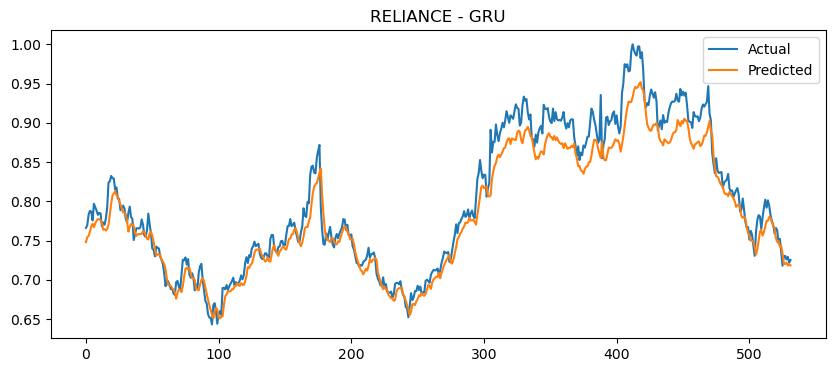

C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
INFOSYS - LSTM RMSE: 0.02, MAE: 0.02


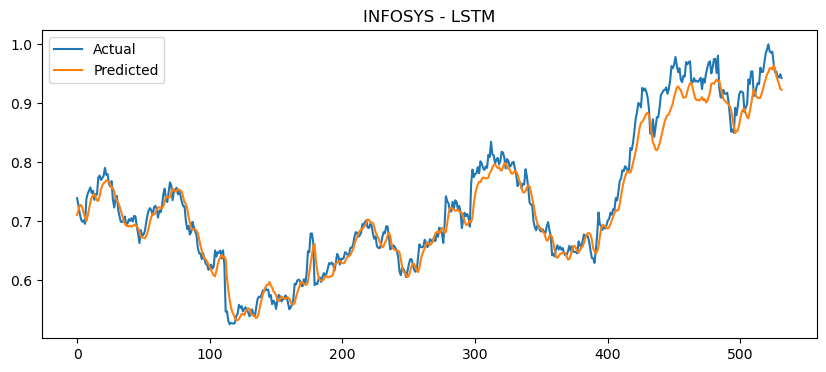

C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
INFOSYS - GRU RMSE: 0.02, MAE: 0.02


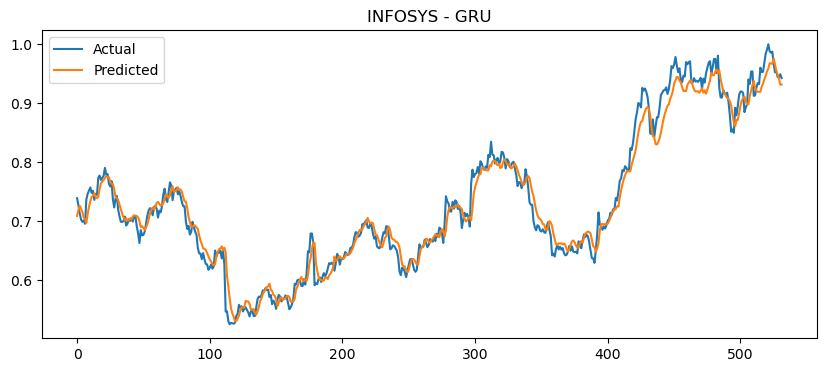

In [65]:
stock_files = {
    'TCS': 'TCS.csv',
    'RELIANCE': 'RELIANCE.csv',
    'INFOSYS': 'INFOSYS.csv'
}

results = []

for stock, file in stock_files.items():
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
    
    for model_type in ['LSTM', 'GRU']:
        rmse, mae = train_and_evaluate(df.copy(), stock, model_type=model_type)
        results.append({'Stock': stock, 'Model': model_type, 'RMSE': rmse, 'MAE': mae})


7. Show Summary Table

In [67]:
results_df = pd.DataFrame(results)
results_df


,Stock,Model,RMSE,MAE
0,TCS,LSTM,0.029866,0.021692
1,TCS,GRU,0.025343,0.021773
2,RELIANCE,LSTM,0.029124,0.022445
3,RELIANCE,GRU,0.024148,0.018725
4,INFOSYS,LSTM,0.024385,0.018490
5,INFOSYS,GRU,0.020835,0.015675


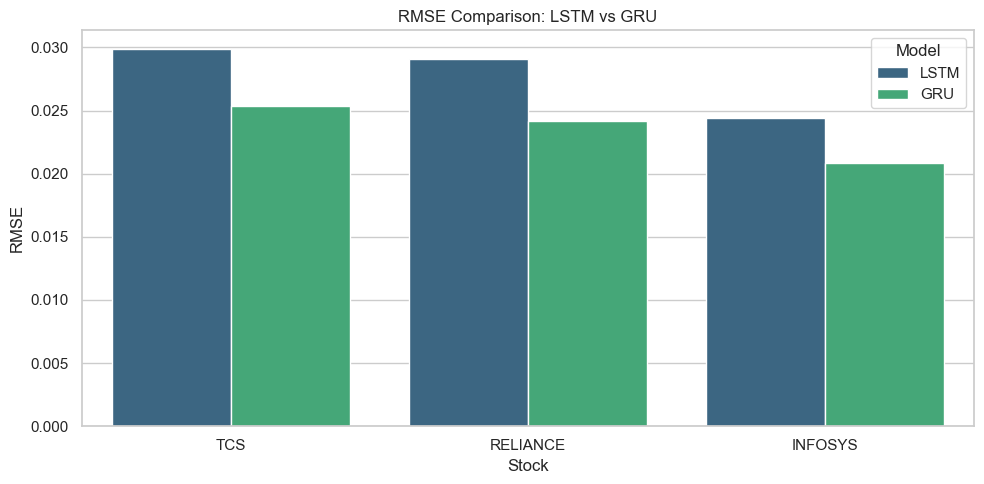

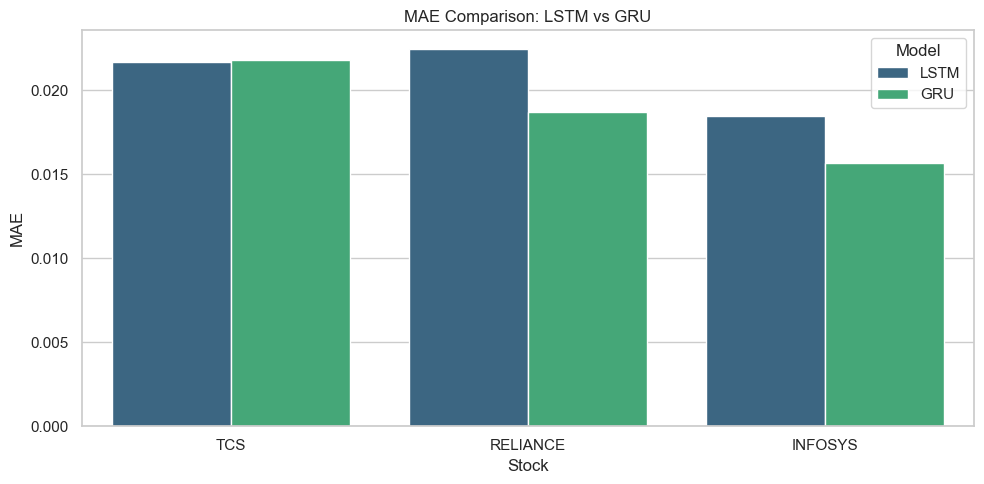

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Define the viridis palette
viridis_palette = sns.color_palette("viridis", n_colors=results_df['Model'].nunique())

# Plot RMSE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Stock', y='RMSE', hue='Model', data=results_df, palette=viridis_palette)
plt.title('RMSE Comparison: LSTM vs GRU')
plt.ylabel('RMSE')
plt.xlabel('Stock')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Plot MAE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Stock', y='MAE', hue='Model', data=results_df, palette=viridis_palette)
plt.title('MAE Comparison: LSTM vs GRU')
plt.ylabel('MAE')
plt.xlabel('Stock')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

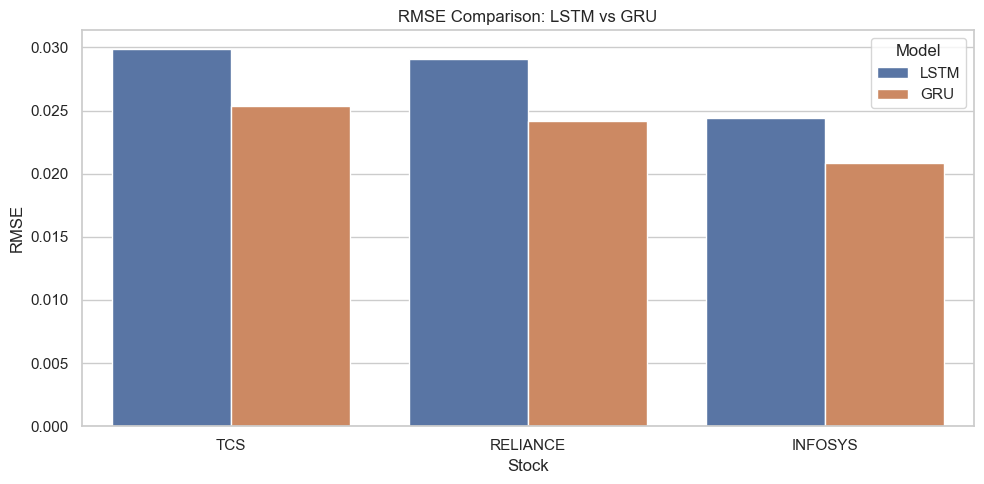

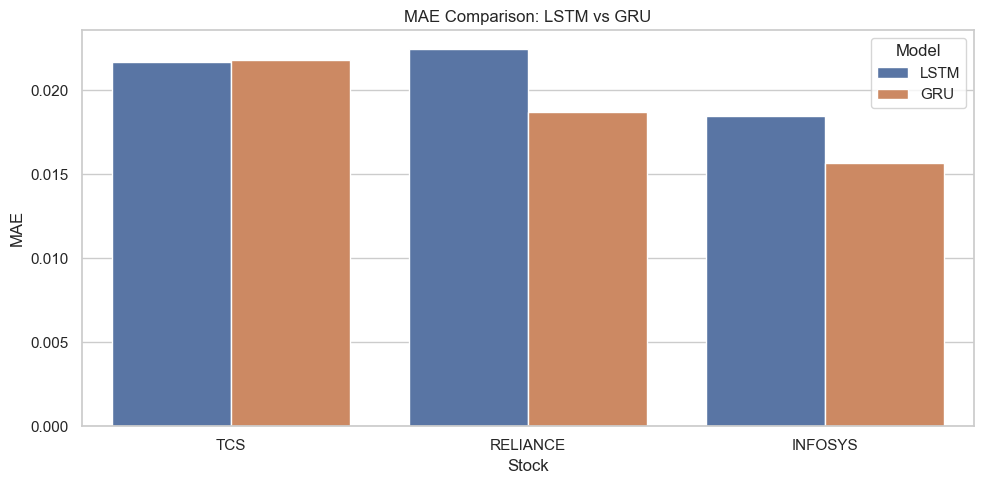

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Plot RMSE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Stock', y='RMSE', hue='Model', data=results_df)
plt.title('RMSE Comparison: LSTM vs GRU')
plt.ylabel('RMSE')
plt.xlabel('Stock')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Plot MAE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Stock', y='MAE', hue='Model', data=results_df)
plt.title('MAE Comparison: LSTM vs GRU')
plt.ylabel('MAE')
plt.xlabel('Stock')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [77]:
def run_comparison(df, stock_name, model_type='LSTM', lookback=30):
    results = []
    
    # Common columns
    base_features = ['Open', 'High', 'Low', 'Close', 'Volume']

    # --------- WITHOUT Technical Indicators ---------
    df_base = df[base_features].copy().dropna()
    scaler_base = MinMaxScaler()
    df_base_scaled = pd.DataFrame(scaler_base.fit_transform(df_base), columns=base_features, index=df_base.index)

    X_base, y_base = create_sequences(df_base_scaled.values, df_base_scaled.columns.get_loc('Close'), lookback)
    split = int(len(X_base) * 0.8)
    Xb_train, Xb_test, yb_train, yb_test = X_base[:split], X_base[split:], y_base[:split], y_base[split:]

    model_base = build_model(model_type, input_shape=(X_base.shape[1], X_base.shape[2]))
    model_base.fit(Xb_train, yb_train, epochs=50, batch_size=32, verbose=0)
    yb_pred = model_base.predict(Xb_test)
    base_rmse = np.sqrt(mean_squared_error(yb_test, yb_pred))
    base_mae = mean_absolute_error(yb_test, yb_pred)
    results.append({'Stock': stock_name, 'Model': model_type, 'Indicators': 'No', 'RMSE': base_rmse, 'MAE': base_mae})

    # --------- WITH Technical Indicators ---------
    df_ind = add_technical_indicators(df.copy())
    all_features = base_features + ['RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'BB_Upper', 'BB_Lower']
    scaler_ind = MinMaxScaler()
    df_ind_scaled = pd.DataFrame(scaler_ind.fit_transform(df_ind[all_features]), columns=all_features, index=df_ind.index)

    X_ind, y_ind = create_sequences(df_ind_scaled.values, df_ind_scaled.columns.get_loc('Close'), lookback)
    split = int(len(X_ind) * 0.8)
    Xi_train, Xi_test, yi_train, yi_test = X_ind[:split], X_ind[split:], y_ind[:split], y_ind[split:]

    model_ind = build_model(model_type, input_shape=(X_ind.shape[1], X_ind.shape[2]))
    model_ind.fit(Xi_train, yi_train, epochs=50, batch_size=32, verbose=0)
    yi_pred = model_ind.predict(Xi_test)
    ind_rmse = np.sqrt(mean_squared_error(yi_test, yi_pred))
    ind_mae = mean_absolute_error(yi_test, yi_pred)
    results.append({'Stock': stock_name, 'Model': model_type, 'Indicators': 'Yes', 'RMSE': ind_rmse, 'MAE': ind_mae})

    return results


In [79]:
stock_files = {
    'TCS': 'TCS.csv',
    'RELIANCE': 'RELIANCE.csv',
    'INFOSYS': 'INFOSYS.csv'
}

comparison_results = []

for stock, file in stock_files.items():
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

    for model_type in ['LSTM', 'GRU']:
        comparison_results += run_comparison(df.copy(), stock, model_type)


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\VATSAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [80]:
compare_df = pd.DataFrame(comparison_results)
compare_df


,Stock,Model,Indicators,RMSE,MAE
0,TCS,LSTM,No,0.026052,0.019968
1,TCS,LSTM,Yes,0.039186,0.030635
2,TCS,GRU,No,0.016574,0.012291
3,TCS,GRU,Yes,0.026621,0.019824
4,RELIANCE,LSTM,No,0.020399,0.016193
5,RELIANCE,LSTM,Yes,0.025397,0.021578
6,RELIANCE,GRU,No,0.031288,0.026621
7,RELIANCE,GRU,Yes,0.018648,0.014728
8,INFOSYS,LSTM,No,0.025174,0.019025
9,INFOSYS,LSTM,Yes,0.024029,0.019054


C:\Users\VATSAL\AppData\Local\Temp\ipykernel_20472\1723396162.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stock', y='RMSE', hue='Indicators', data=compare_df, ci=None, palette=distinct_palette)


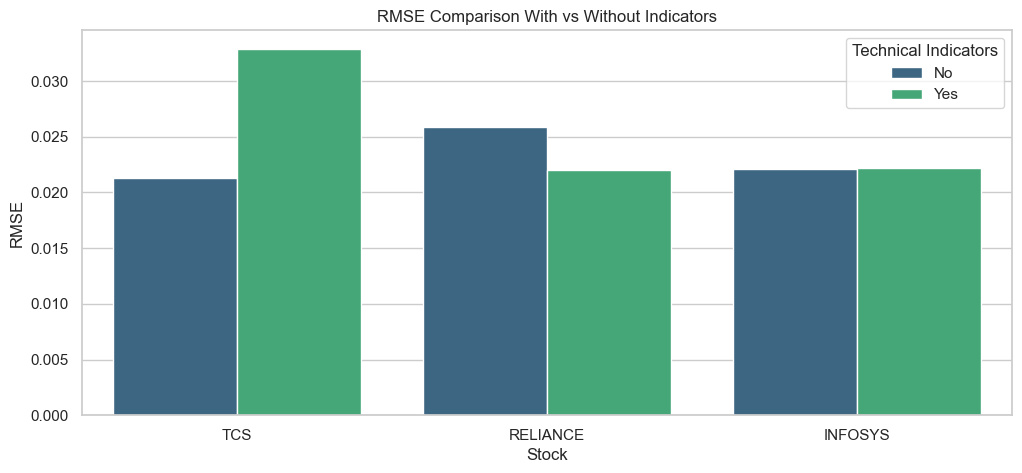

C:\Users\VATSAL\AppData\Local\Temp\ipykernel_20472\1723396162.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stock', y='MAE', hue='Indicators', data=compare_df, ci=None, palette=distinct_palette)


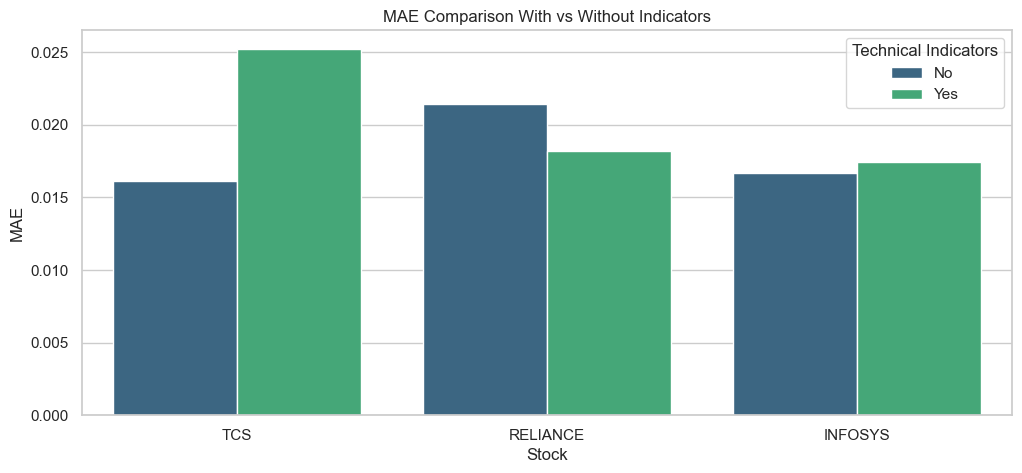

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming compare_df is already defined as in your previous example

# Define a visually distinct color palette
distinct_palette = sns.color_palette("viridis", n_colors=compare_df['Indicators'].nunique())

# RMSE comparison
plt.figure(figsize=(12, 5))
sns.barplot(x='Stock', y='RMSE', hue='Indicators', data=compare_df, ci=None, palette=distinct_palette)
plt.title('RMSE Comparison With vs Without Indicators')
plt.ylabel('RMSE')
plt.xlabel('Stock')
plt.legend(title='Technical Indicators')
plt.show()

# MAE comparison
plt.figure(figsize=(12, 5))
sns.barplot(x='Stock', y='MAE', hue='Indicators', data=compare_df, ci=None, palette=distinct_palette)
plt.title('MAE Comparison With vs Without Indicators')
plt.ylabel('MAE')
plt.xlabel('Stock')
plt.legend(title='Technical Indicators')
plt.show()